## Proyecto 1 – Relación Minutos Ingreso
- Angie Carolina Quintana Guerrero
- Juan Pablo Marín

El objetivo de este cuadernillo de Python es dar respuesta a la pregunta ¿habrá relación entre los minutos usados con la compañía y el ingreso total de los clientes?

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
base_datos = pd.read_csv("https://raw.githubusercontent.com/Izainea/seminario-de-programacion/master/Cuadernos/Clase%202/Bases/Credito_dias.csv", sep=',')

Para dar respuesta, empezaremos a hacer un análisis exploratorio de las variables...

In [13]:
base_datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   totmou       10000 non-null  float64
 1   totrev       10000 non-null  float64
 2   creditcd     9848 non-null   object 
 3   eqpdays      10000 non-null  int64  
 4   Customer_ID  10000 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 390.8+ KB


In [14]:
base_datos.describe()

,totmou,totrev,eqpdays,Customer_ID
count,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,7692.804866,1042.133807,386.794500,1.049965e+06
std,8657.917883,857.144895,252.720196,2.879424e+04
min,0.000000,11.100000,-5.000000,1.000014e+06
25%,2576.000000,526.787500,210.000000,1.025053e+06
50%,5262.000000,820.235000,338.000000,1.049652e+06
75%,9823.250000,1272.975000,522.000000,1.074798e+06
max,163264.176700,13426.600000,1823.000000,1.099992e+06


Revisamos los campos vacíos de la columna creditcd

In [15]:
base_datos[base_datos['creditcd'].isnull()]

,totmou,totrev,creditcd,eqpdays,Customer_ID
44,5684.0,857.65,NaN,244,1072218
47,925.0,373.12,NaN,344,1066597
127,14466.0,2243.76,NaN,387,1023352
253,2504.0,756.79,NaN,495,1045521
427,76260.0,5526.11,NaN,361,1001813
...,...,...,...,...,...
9428,15591.0,1330.71,NaN,447,1050795
9561,3011.0,522.14,NaN,74,1096985
9634,853.0,650.34,NaN,780,1025203
9783,33660.0,4247.85,NaN,206,1099258


Eliminamos la data que está en NaN, creando una copia de la base de datos para no dañar la original.

In [16]:
data_clean = base_datos.copy()

In [17]:
data_clean = data_clean.dropna(subset=['creditcd'])
data_clean.head()

,totmou,totrev,creditcd,eqpdays,Customer_ID
0,7269.0,906.58,Y,371,1082423
1,13552.0,1172.25,N,83,1069232
2,4152.0,577.39,Y,675,1031705
3,1863.0,294.26,Y,218,1089806
4,4155.0,433.16,N,222,1076695


ahora, convertiremos el campo creditcd a boleano, pues se trata de una variable binaria.

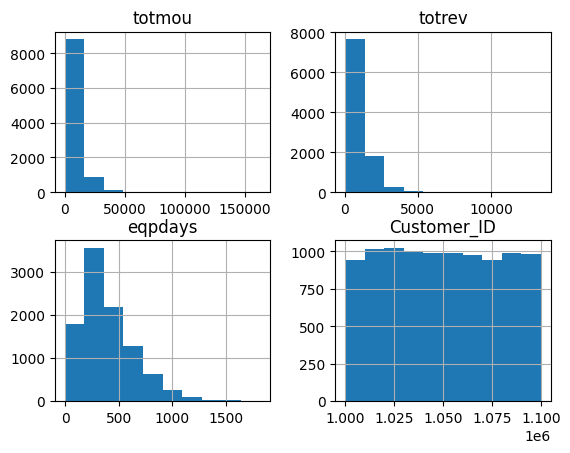

In [18]:
data_clean.hist()
plt.show()

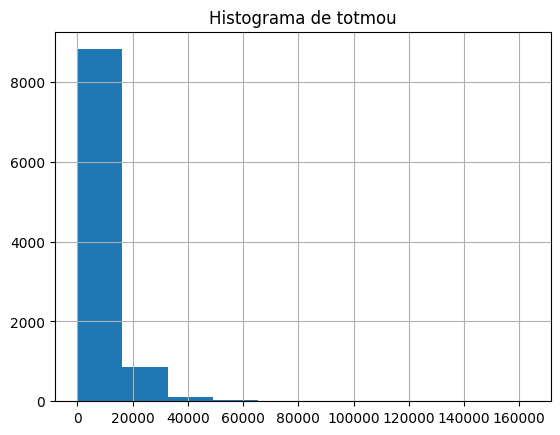

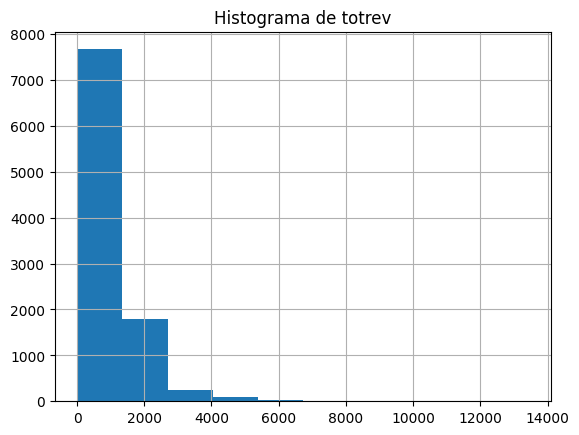

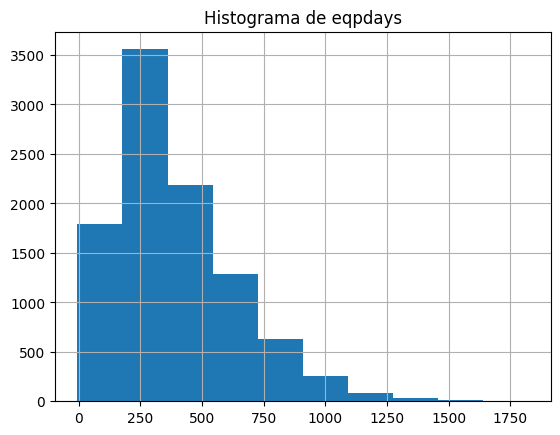

In [19]:
numeric_variables = ['totmou', 'totrev', 'eqpdays']
for var in numeric_variables:
    data_clean[var].hist()
    plt.title(f'Histograma de {var}')
    plt.show()

In [20]:
data_clean['creditcd'].value_counts()

creditcd
Y    6796
N    3052
Name: count, dtype: int64

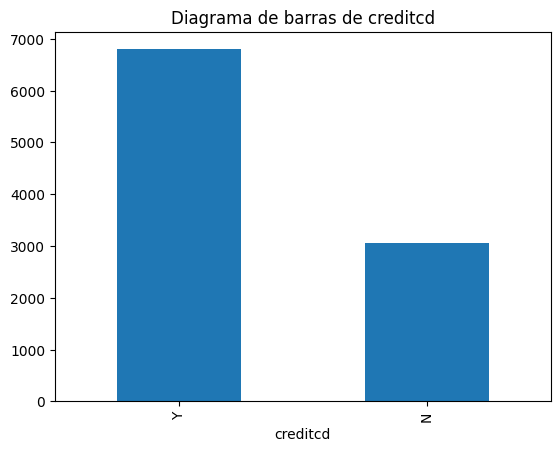

In [21]:
data_clean['creditcd'].value_counts().plot(kind='bar')
plt.title('Diagrama de barras de creditcd')
plt.show()

<Axes: >

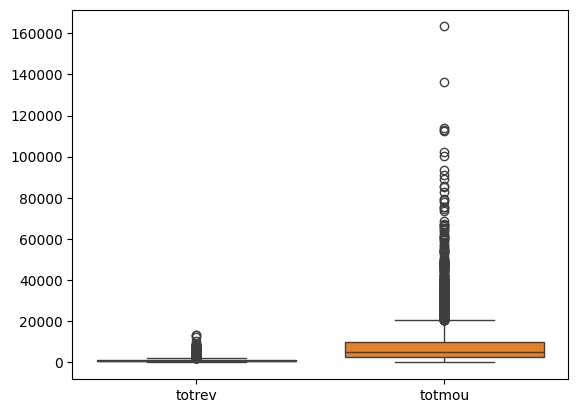

In [22]:
sns.boxplot(data_clean[['totrev', 'totmou']])

a continuación se presenta un diagrama de dispersión entre las variables totrev y totmou.

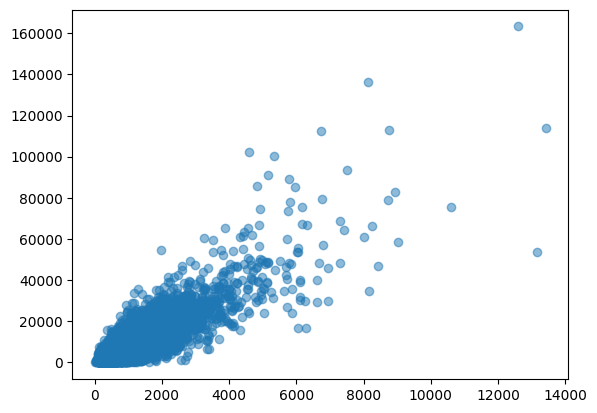

In [23]:
plt.scatter(data_clean['totrev'], data_clean['totmou'], alpha=0.5)
plt.show()

Conclusión:

Cuando observamos el gráfico donde los puntos representan los ingresos de los clientes (en el eje horizontal) versus la cantidad de minutos que utilizan (en el eje vertical), parece que, en general, a medida que los clientes ganan más dinero, también tienden a usar más minutos. Sin embargo, no todos los clientes siguen exactamente esta tendencia. Hay una dispersión de puntos alrededor de la línea imaginaria que indica esta relación, lo que significa que hay clientes que ganan montos similares pero usan cantidades de minutos muy diferentes. Esto sugiere que otros factores además de los ingresos pueden influir en la cantidad de minutos que los clientes utilizan, como sus preferencias personales, hábitos de comunicación o necesidades individuales.

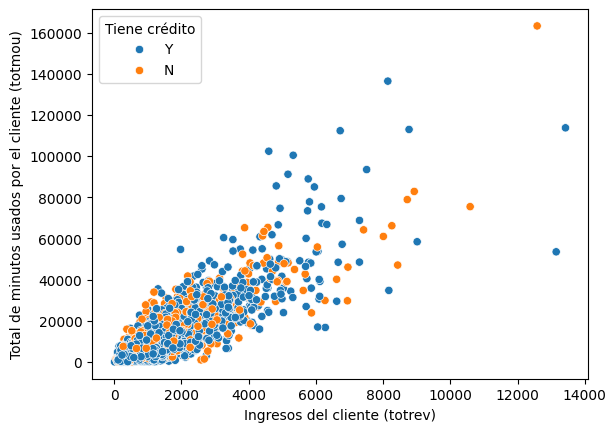

In [24]:
sns.scatterplot(x='totrev', y='totmou', hue='creditcd', data=data_clean, alpha=1)
plt.xlabel('Ingresos del cliente (totrev)')
plt.ylabel('Total de minutos usados por el cliente (totmou)')
plt.legend(title='Tiene crédito')
plt.show()

Del gráfico, incluyendo la variable si tiene crédito o no, se puede decir que en general la personas que la mayoría de las personas que no tienen crédito tienen menos ingresos y consumen menos minutos, sin embargo, la variable no tiene relación directa con alguna de las dos premisas.